In [1]:
import os
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

pd.options.display.max_rows = 20
sns.set(style="darkgrid")
%matplotlib inline

In [5]:
files_directory = os.listdir("E:/CNN比赛/train_simplified/")
train = pd.DataFrame()
for file in files_directory:
    train = train.append(pd.read_csv('E:/CNN比赛/train_simplified/' + file, index_col='key_id', usecols=[1, 2, 3, 5]))
# Shuffle data
train = shuffle(train, random_state=123)

In [7]:
print('Train number of rows: ', train.shape[0])
print('Train number of columns: ', train.shape[1])
print('Train set features: %s' % train.columns.values)
print('Train number of label categories: %s' % len(files_directory))

Train number of rows:  49707579
Train number of columns:  3
Train set features: ['drawing' 'recognized' 'word']
Train number of label categories: 340


In [8]:
count_gp = train.groupby(['word']).size().reset_index(name='count').sort_values('count', ascending=False)
top_10 = count_gp[:10]
bottom_10 = count_gp[count_gp.shape[0]-10:count_gp.shape[0]]

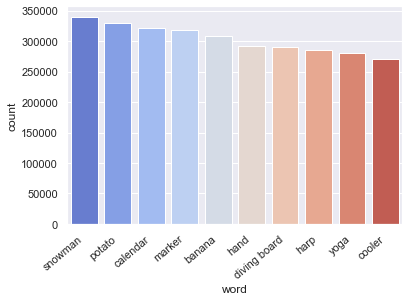

In [17]:
ax_t10 = sns.barplot(x="word", y="count", data=top_10, palette="coolwarm",ci=500)
ax_t10.set_xticklabels(ax_t10.get_xticklabels(), rotation=40, ha="right")
plt.show()

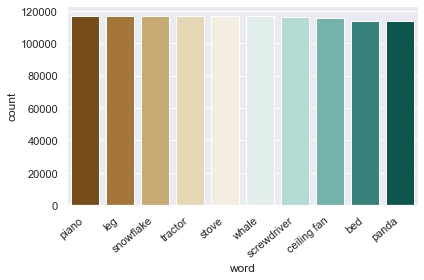

In [10]:
ax_b10 = sns.barplot(x="word", y="count", data=bottom_10, palette="BrBG")
ax_b10.set_xticklabels(ax_b10.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

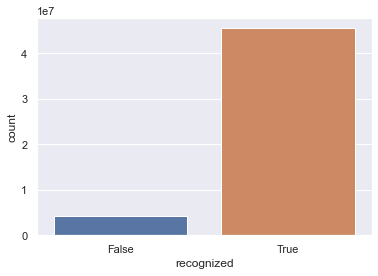

In [11]:
sns.countplot(x="recognized", data=train)
plt.show()

In [18]:
train['recognized'].value_counts()

True     45512752
False     4194827
Name: recognized, dtype: int64

In [19]:
4194827/(4194827+45512752)

0.08439008868245222

In [12]:
rec_gp = train.groupby(['word', 'recognized']).size().reset_index(name='count')
rec_true = rec_gp[(rec_gp['recognized'] == True)].rename(index=str, columns={"recognized": "recognized_true", "count": "count_true"})
rec_false = rec_gp[(rec_gp['recognized'] == False)].rename(index=str, columns={"recognized": "recognized_false", "count": "count_false"})
rec_gp = rec_true.set_index('word').join(rec_false.set_index('word'), on='word')
rec_gp

,recognized_true,count_true,recognized_false,count_false
word,,,,
The Eiffel Tower,True,130433,False,4368
The Great Wall of China,True,171064,False,21951
The Mona Lisa,True,111580,False,9803
airplane,True,135823,False,15800
alarm clock,True,113911,False,9488
...,...,...,...,...
wine glass,True,124895,False,7407
wristwatch,True,140672,False,21973
yoga,True,258493,False,21949


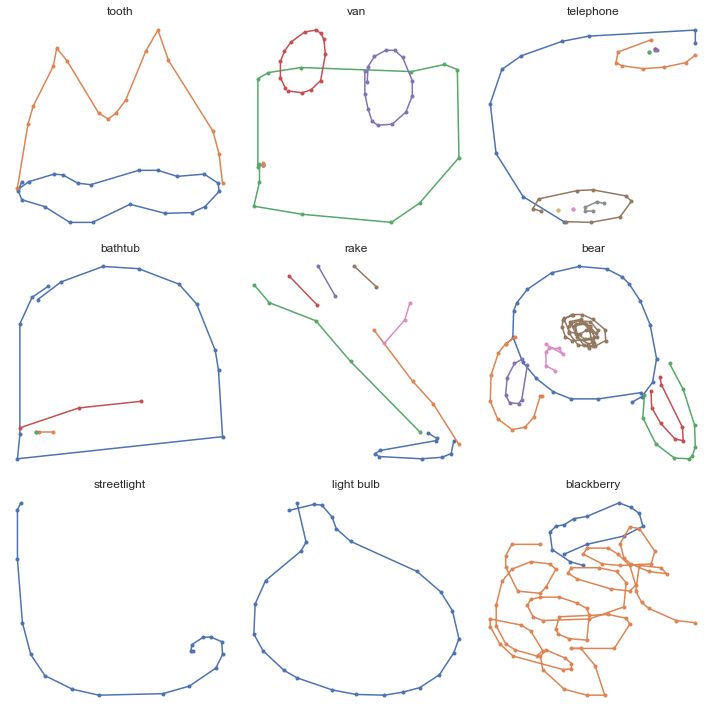

In [13]:
words = train['word'].tolist()
drawings = [ast.literal_eval(pts) for pts in train[:9]['drawing'].values]

plt.figure(figsize=(10, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(330 + (i+1))
    for x,y in drawing:
        plt.plot(x, y, marker='.')
        plt.tight_layout()
        plt.title(words[i]);
        plt.axis('off')